### QED-C Application-Oriented Benchmarks - Hamiltonian Simulation with HamLib - Observables

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one a variation of this benchmark.

This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Note: This set of benchmarks exercises new observable-oriented assessments currently under development.
This is a WORK-IN-PROGRESS.


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
min_qubits=4
max_qubits=16
skip_qubits=1
max_circuits=1
num_shots=10000

K = 1             # number of Trotter steps
t = 0.1           # total evolution time

group_method = "simple"   # method to generate commuting groups
                            # None, "simple", "1", "2", "N"

#backend_id="qasm_simulator"
backend_id="statevector_simulator"

hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

api="qiskit"


In [3]:
# Configure benchmark library modules
import sys
sys.path.insert(1, "../_common")
sys.path.insert(1, "../_common/qiskit")

import execute
execute.verbose = False
execute.verbose_time = False
#execute.noise = None

# Configure paths for hamlib benchmark modules
sys.path.insert(1, "_common")
sys.path.insert(1, "qiskit")

# ... access to HamLib datasets
import hamlib_utils
hamlib_utils.verbose = False

# ... for api-specific kernel functions (circuits)
import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False

# ... for high-level HamLib simulation benchmark loop
import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False


### Hamiltonian Simulation - Transverse Field Ising Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Jan 31, 2025 16:02:14 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... total execution time = 0.034
... exact computation time = 0.006 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -3.2383
    ==> Simulation Quality: 0.81

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... total execution time = 0.013
... exact computation time = 0.009 sec

    Exact expectation value, computed classically: -3.0
    Estimated expectation value, from quantum algorithm: -2.5898
    ==> Simulation Quality: 0.863

************
Executing [1] circuits with num_qubits = 6
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-6_h-2
... total execution time = 0.014
... exact computation time = 0.013 sec

    Exact expectation value, 

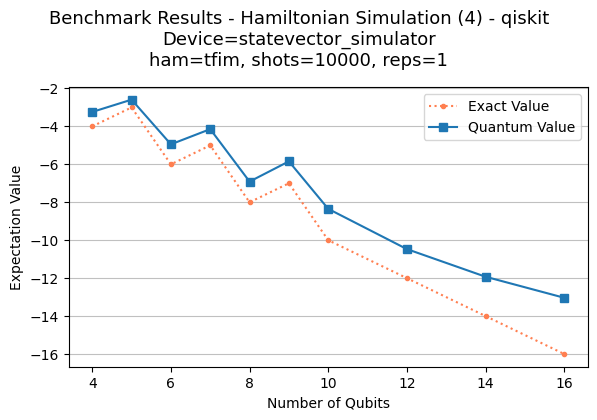

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - qiskit
Device=statevector_simulator
ham=tfim, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 5, 6, 7, 8, 9, 10, 12, 14, 16]
[0.006, 0.009, 0.013, 0.016, 0.024, 0.03, 0.037, 0.06, 0.195, 0.621]
[0.034, 0.013, 0.014, 0.016, 0.017, 0.02, 0.022, 0.029, 0.037, 0.046]


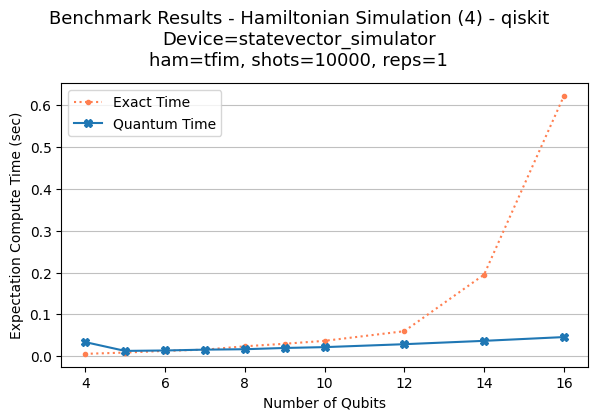

In [4]:
# Transverse Field Ising Model - 1D grid pbc h=2
hamiltonian_name = 'condensedmatter/tfim/tfim'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True, 
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Heisenberg Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Jan 31, 2025 16:02:23 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... total execution time = 0.025
... exact computation time = 0.019 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -3.9805
    ==> Simulation Quality: 0.995

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... total execution time = 0.028
... exact computation time = 0.029 sec

    Exact expectation value, computed classically: -1.0
    Estimated expectation value, from quantum algorithm: -4.9844
    ==> Simulation Quality: 4.984

************
Executing [1] circuits with num_qubits = 6
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-6_h-2
... total execution time = 0.034
... exact computation time = 0.041 sec

    Exact expectation value,

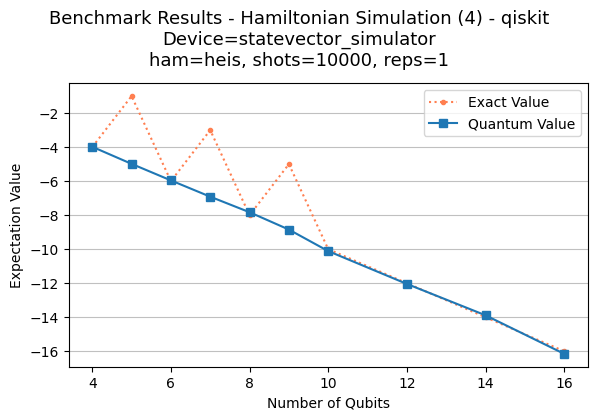

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - qiskit
Device=statevector_simulator
ham=heis, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 5, 6, 7, 8, 9, 10, 12, 14, 16]
[0.019, 0.029, 0.041, 0.057, 0.074, 0.096, 0.121, 0.185, 0.309, 0.958]
[0.025, 0.028, 0.034, 0.037, 0.046, 0.053, 0.061, 0.08, 0.12, 0.117]


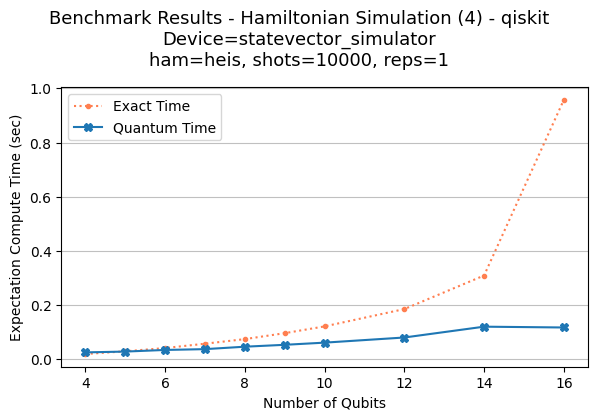

In [5]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/heisenberg/heis'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Fermi-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Jan 31, 2025 16:02:28 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-2_U-12_enc-bk
... total execution time = 0.017
... exact computation time = 0.014 sec

    Exact expectation value, computed classically: -0.0
    Estimated expectation value, from quantum algorithm: 0.0312
    ==> Simulation Quality: -540468897626653.7

************
Executing [1] circuits with num_qubits = 6
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-3_U-12_enc-bk
... total execution time = 0.073
... exact computation time = 0.037 sec

    Exact expectation value, computed classically: -0.0
    Estimated expectation value, from quantum algorithm: 0.0908
    ==> Simulation Quality: -818036651065344.0

************
Executing [1] circuits with num_qubits = 8
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-4_U-12_enc-bk
... total execution time = 0.073
... exact c

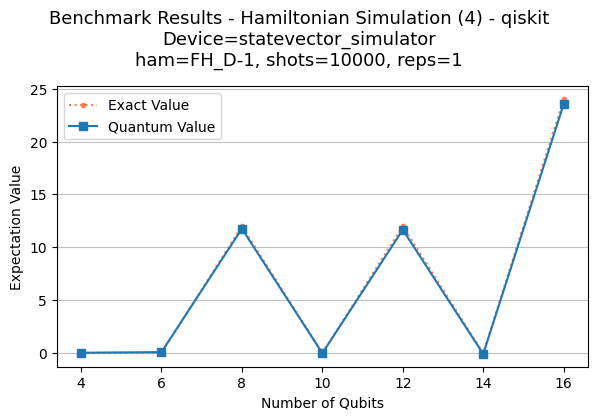

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - qiskit
Device=statevector_simulator
ham=FH_D-1, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 6, 8, 10, 12, 14, 16]
[0.014, 0.037, 0.068, 0.11, 0.172, 0.318, 0.859]
[0.017, 0.073, 0.073, 0.15, 0.194, 0.287, 0.245]


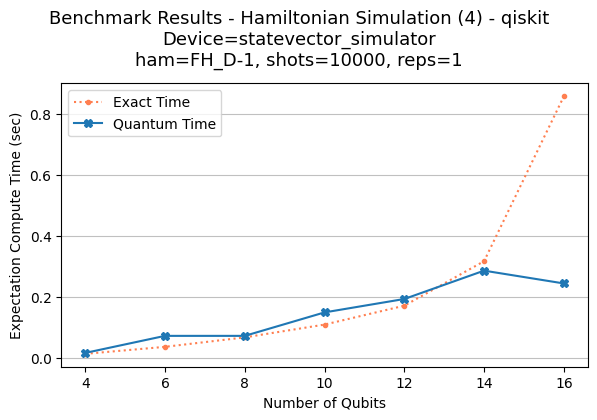

In [6]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/fermihubbard/FH_D-1'
hamiltonian_params = { "1D-grid": "pbc", "enc": "bk", "U":12 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Bose-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Jan 31, 2025 16:02:39 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-10_enc-gray_d-4
... total execution time = 0.161
... exact computation time = 0.041 sec

    Exact expectation value, computed classically: 60.0
    Estimated expectation value, from quantum algorithm: 60.0311
    ==> Simulation Quality: 1.001

************
Executing [1] circuits with num_qubits = 6
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-3_U-10_enc-gray_d-4
... total execution time = 0.342
... exact computation time = 0.119 sec

    Exact expectation value, computed classically: 90.0
    Estimated expectation value, from quantum algorithm: 89.9643
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 8
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-4_U-10_enc-gray_d-4
... total execution time = 0.503
... exact 

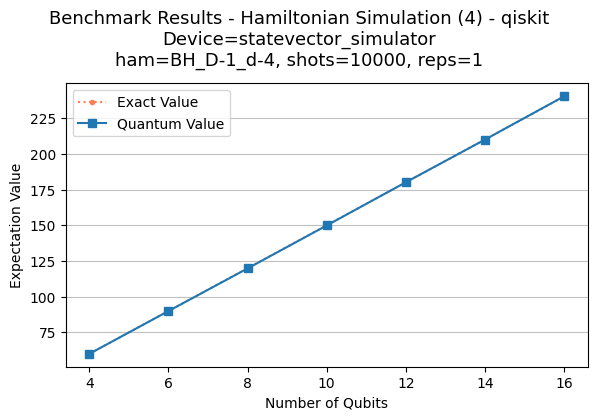

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - qiskit
Device=statevector_simulator
ham=BH_D-1_d-4, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 6, 8, 10, 12, 14, 16]
[0.041, 0.119, 0.25, 0.39, 0.694, 1.345, 3.758]
[0.161, 0.342, 0.503, 0.745, 0.927, 1.636, 1.586]


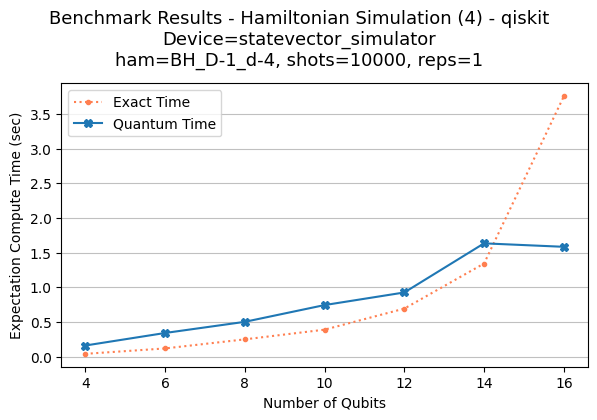

In [7]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/bosehubbard/BH_D-1_d-4'
hamiltonian_params = { "1D-grid": "nonpbc", "enc": "gray", "U":10 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = 0.1,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Jan 31, 2025 16:02:54 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = max3sat_n-4_ratio-2_rinst-02
... total execution time = 0.014
... exact computation time = 0.014 sec

    Exact expectation value, computed classically: 7.0
    Estimated expectation value, from quantum algorithm: 7.0
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 5
... dataset_name = max3sat_n-5_ratio-2_rinst-02
... total execution time = 0.015
... exact computation time = 0.024 sec

    Exact expectation value, computed classically: 8.0
    Estimated expectation value, from quantum algorithm: 8.0
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = max3sat_n-6_ratio-2_rinst-02
... total execution time = 0.019
... exact computation time = 0.038 sec

    Exact expectation value, computed classically: 10.0
    Estimated

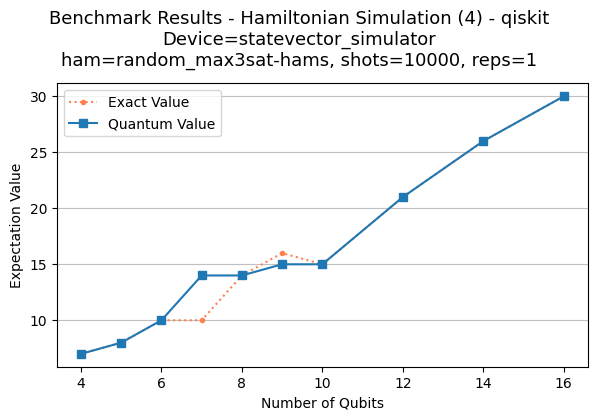

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - qiskit
Device=statevector_simulator
ham=random_max3sat-hams, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 5, 6, 7, 8, 9, 10, 12, 14, 16]
[0.014, 0.024, 0.038, 0.063, 0.085, 0.121, 0.166, 0.224, 0.465, 1.128]
[0.014, 0.015, 0.019, 0.026, 0.027, 0.035, 0.038, 0.051, 0.071, 0.077]


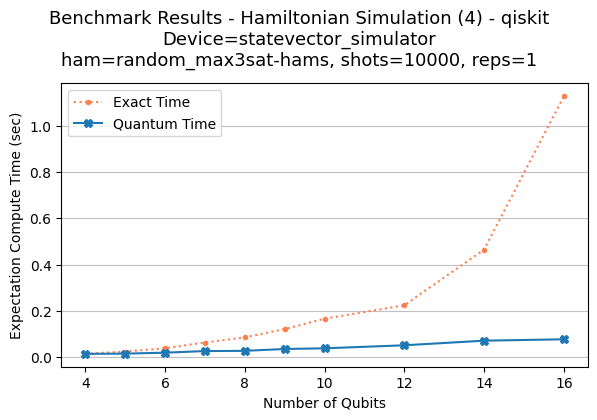

In [8]:
# Max3Sat - ratio 2 rinst 02
hamiltonian_name = 'binaryoptimization/max3sat/random/random_max3sat-hams'
hamiltonian_params = { "ratio": "2", "rinst": "02" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Jan 31, 2025 16:02:58 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = ham_BK-4
... total execution time = 0.033
... exact computation time = 0.017 sec

    Exact expectation value, computed classically: -0.5367
    Estimated expectation value, from quantum algorithm: -0.5367
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = ham_BK-6
... total execution time = 0.656
... exact computation time = 0.101 sec

    Exact expectation value, computed classically: -0.5102
    Estimated expectation value, from quantum algorithm: -0.5114
    ==> Simulation Quality: 1.002

************
Executing [1] circuits with num_qubits = 8
... dataset_name = ham_BK-8
... total execution time = 5.858
... exact computation time = 0.416 sec

    Exact expectation value, computed classically: 0.2017
    Estimated expectation value, from quantum algorit

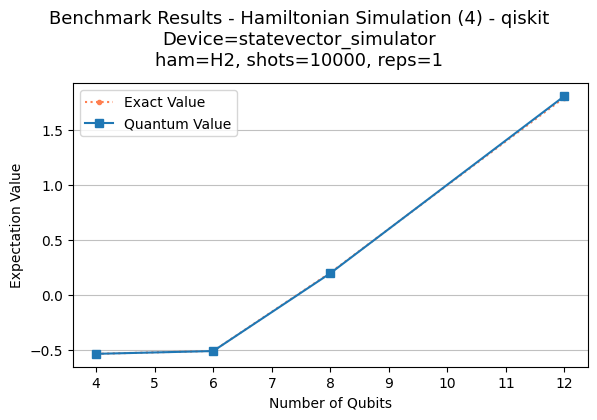

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - qiskit
Device=statevector_simulator
ham=H2, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 6, 8, 12]
[0.017, 0.101, 0.416, 1.296]
[0.033, 0.656, 5.858, 13.021]


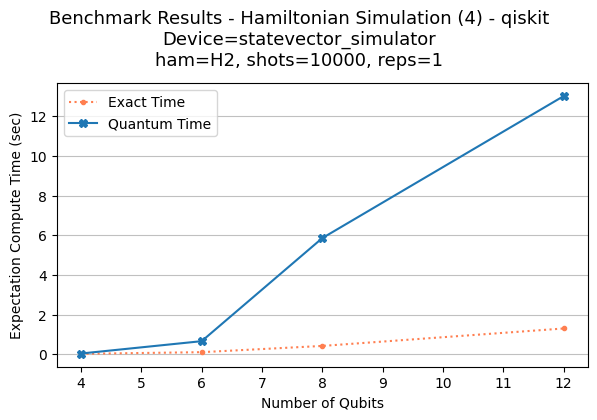

In [9]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/H2'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=min(max_qubits, 12), skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params, group_method = group_method,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Combined Benchmark Results

In [10]:
import qiskit
print(qiskit.__version__)

1.2.1
